In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Read all sheets into a dictionary
sheets_dict = pd.read_excel("BA - Assignment Part 1 data set.xlsx", sheet_name=None)

# Access each DataFrame by sheet name
df_sheet1 = sheets_dict["E Comm"]


In [7]:
df_sheet1.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [8]:
df_sheet1.drop(columns=['CustomerID'], inplace=True)


In [9]:
df_sheet1

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [10]:
# Convert categorical variables into dummy variables
categorical_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode','PreferedOrderCat', 'Gender', 'MaritalStatus']
df_sheet1 = pd.get_dummies(df_sheet1, columns=categorical_cols)


In [11]:
df_sheet1.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,6.0,3.0,3,2,9,1,11.0,1.0,...,0,1,0,0,0,1,0,0,0,1
1,1,NaN,8.0,3.0,4,3,7,1,15.0,0.0,...,0,0,1,0,0,0,1,0,0,1
2,1,NaN,30.0,2.0,4,3,6,1,14.0,0.0,...,0,0,1,0,0,0,1,0,0,1
3,1,0.0,15.0,2.0,4,5,8,0,23.0,0.0,...,0,1,0,0,0,0,1,0,0,1
4,1,0.0,12.0,NaN,3,5,3,0,11.0,1.0,...,0,0,1,0,0,0,1,0,0,1


In [24]:
df_sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  5630 non-null   int64  
 1   Tenure                                 5366 non-null   float64
 2   WarehouseToHome                        5379 non-null   float64
 3   HourSpendOnApp                         5375 non-null   float64
 4   NumberOfDeviceRegistered               5630 non-null   float64
 5   SatisfactionScore                      5630 non-null   float64
 6   NumberOfAddress                        5630 non-null   float64
 7   Complain                               5630 non-null   float64
 8   OrderAmountHikeFromlastYear            5365 non-null   float64
 9   CouponUsed                             5374 non-null   float64
 10  OrderCount                             5372 non-null   float64
 11  DayS

In [12]:
# Scale numerical features
numerical_cols = ['WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
                  'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                  'DaySinceLastOrder', 'CashbackAmount']

In [13]:
scaler = StandardScaler()
df_sheet1[numerical_cols] = scaler.fit_transform(df_sheet1[numerical_cols])

In [14]:
# Splitting features and target variable
X = df_sheet1.drop(columns=['Churn'])
y = df_sheet1['Churn']


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


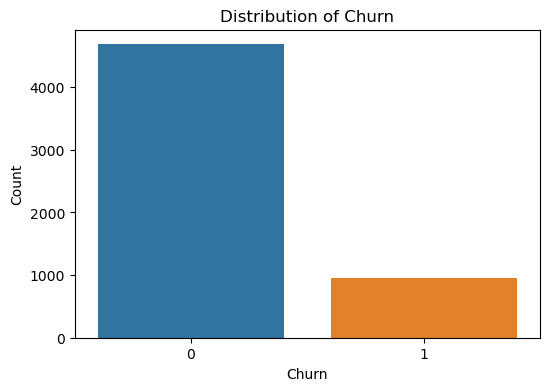

In [16]:
# Explore the distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_sheet1)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [31]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [32]:
# Assuming df_sheet1 contains the dataframe with the dummy variables

g_labels = ['Female', 'Male']  # Note the order based on the dummy variable names
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df_sheet1['Gender_Female'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df_sheet1['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()


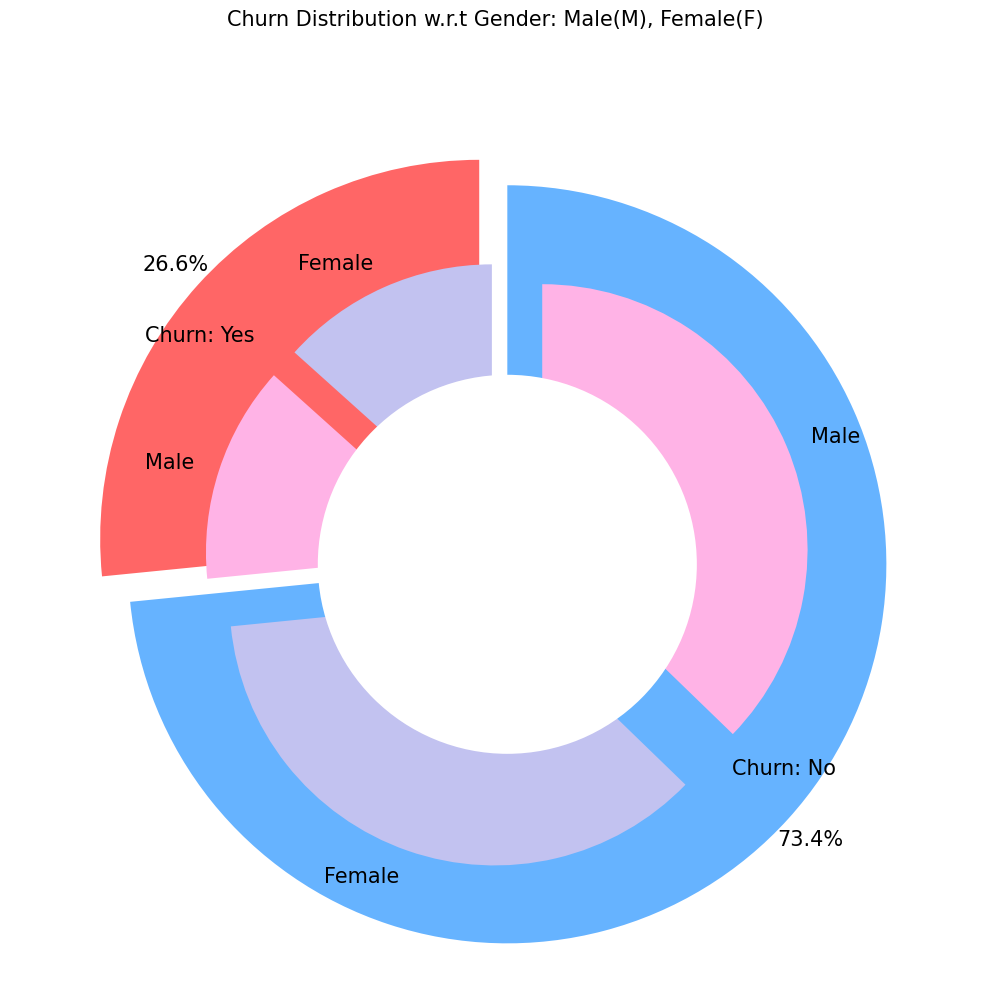

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

# Churn data
labels_churn = ["Churn: Yes", "Churn: No"]
values_churn = [1869, 5163]
colors_churn = ['#ff6666', '#66b3ff']
explode_churn = (0.1, 0) 

# Gender data
labels_gender = ["Female", "Male", "Female", "Male"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0', '#ffb3e6', '#c2c2f0', '#ffb3e6']
explode_gender = (0.1, 0.1, 0.1, 0.1)

textprops = {"fontsize": 15}

# Plot Churn data
plt.pie(values_churn, labels=labels_churn, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8,
        colors=colors_churn, startangle=90, explode=explode_churn, radius=1, textprops=textprops, counterclock=True)

# Plot Gender data
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender, 
        radius=0.7, textprops=textprops, counterclock=True)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# Show plot
plt.axis('equal')
plt.tight_layout()
plt.show()


In [34]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [47]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [48]:
import missingno as msno

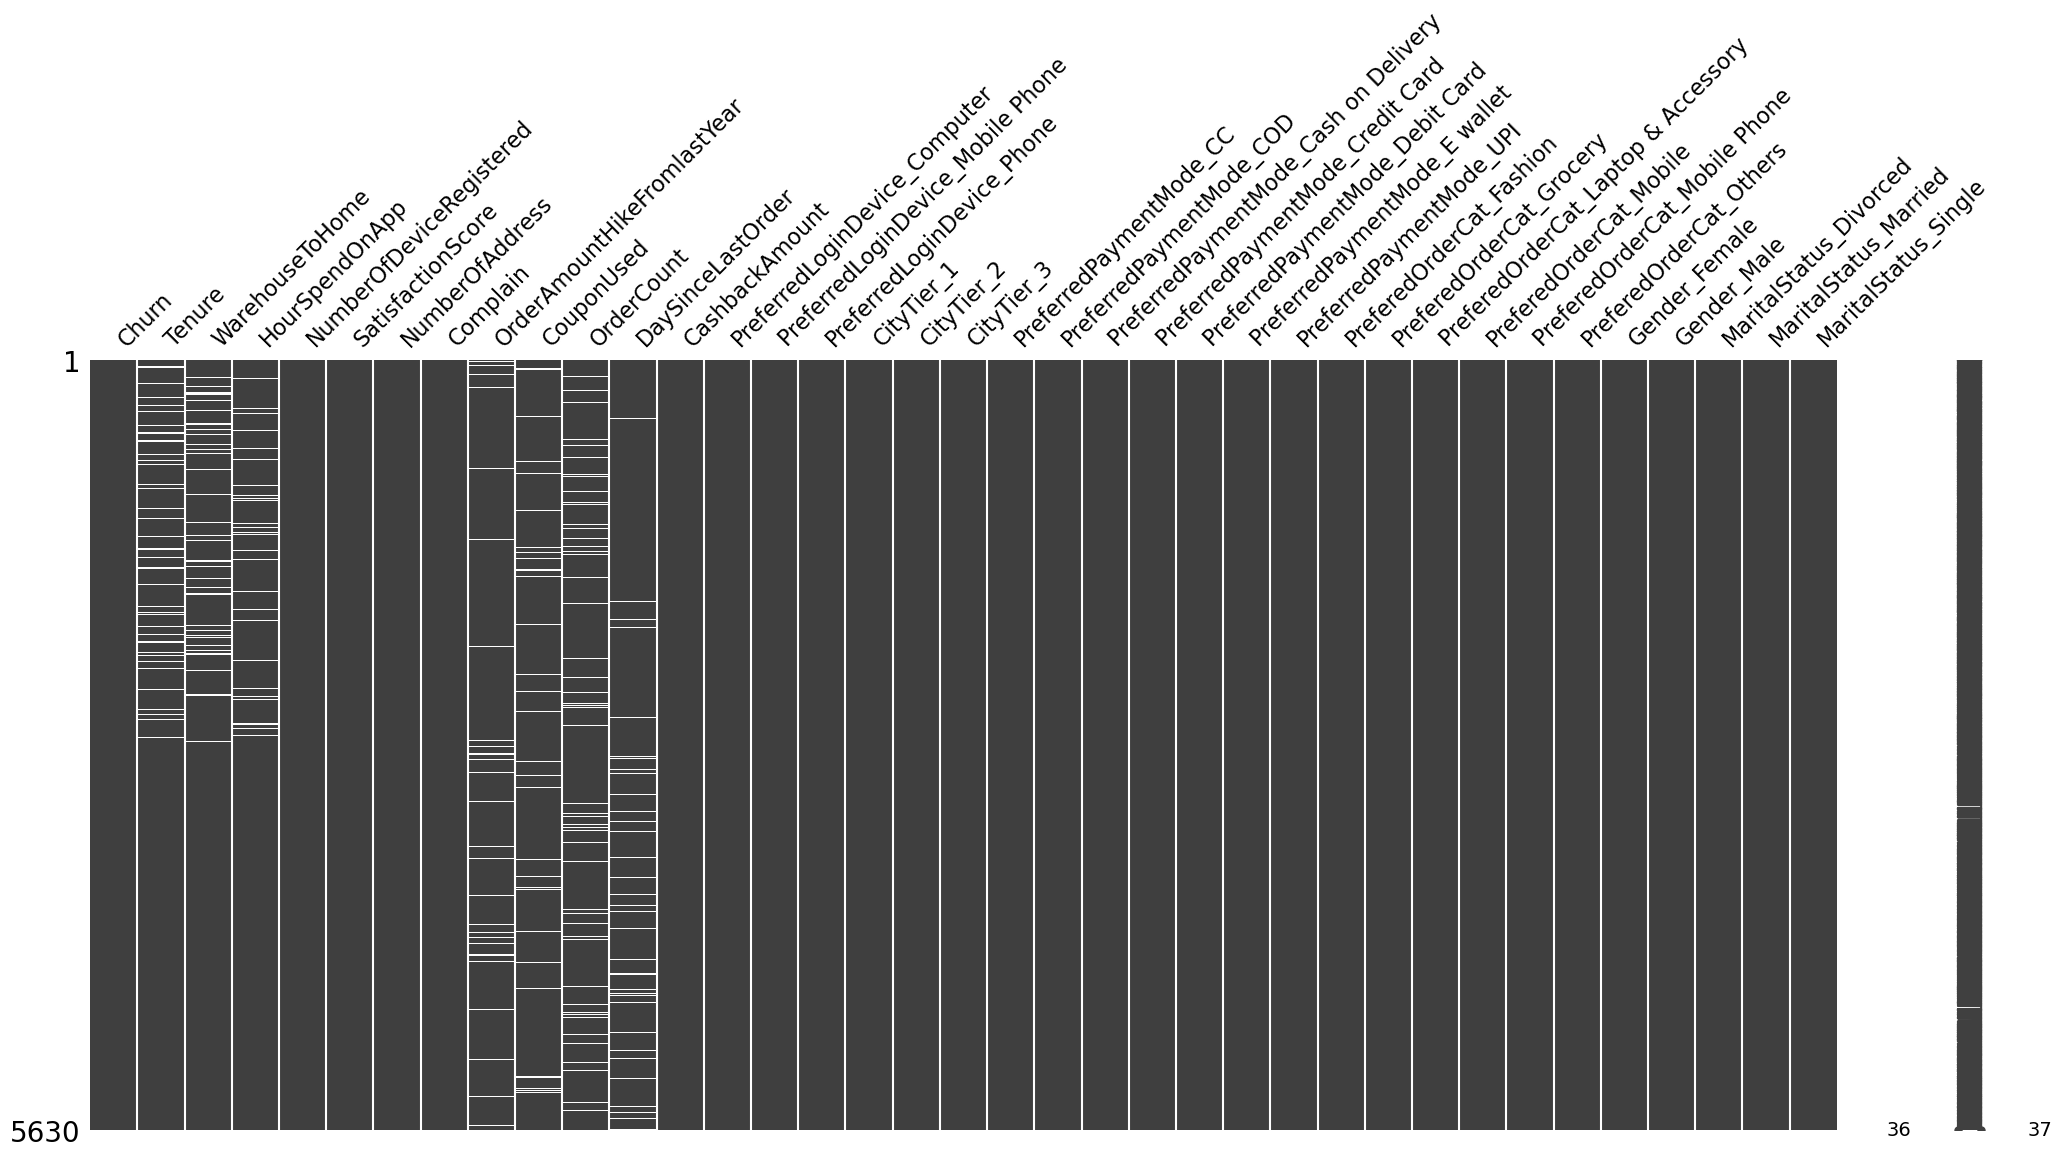

In [50]:
# Visualize missing values as a matrix
msno.matrix(df_sheet1);

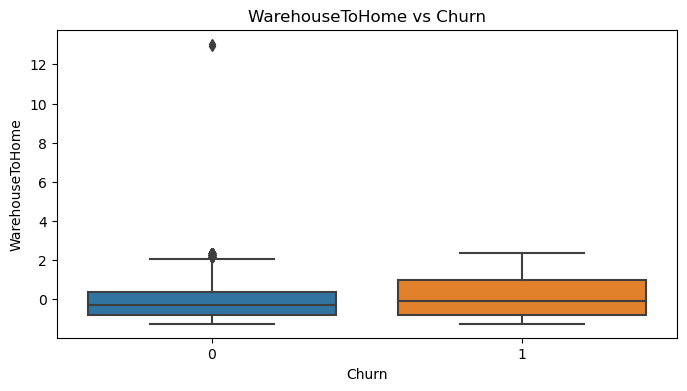

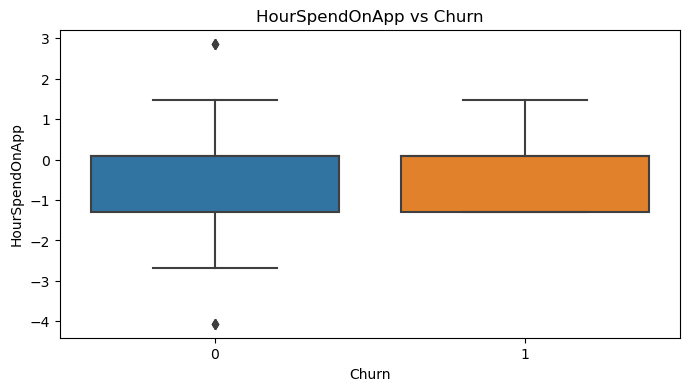

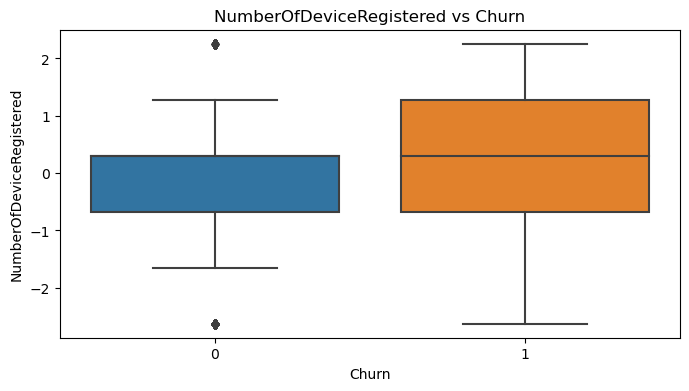

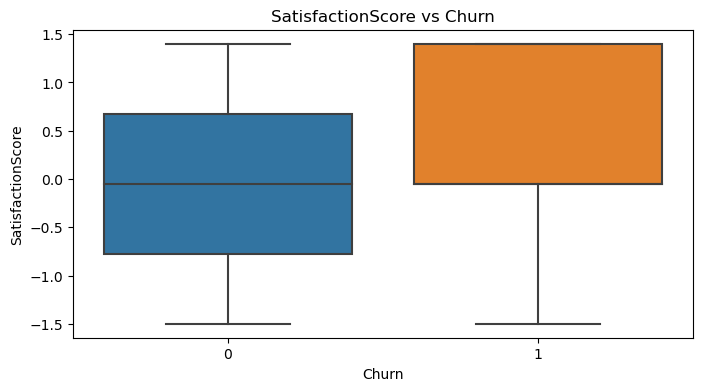

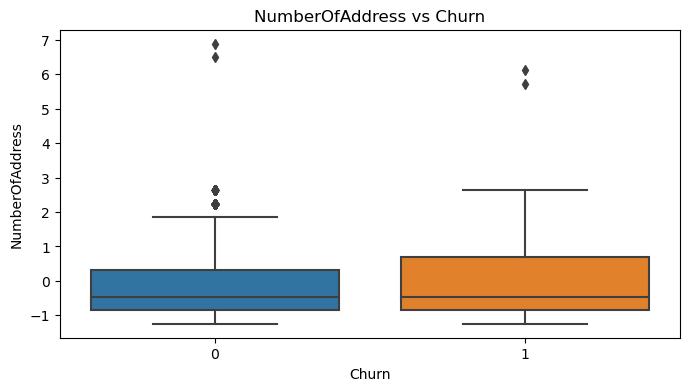

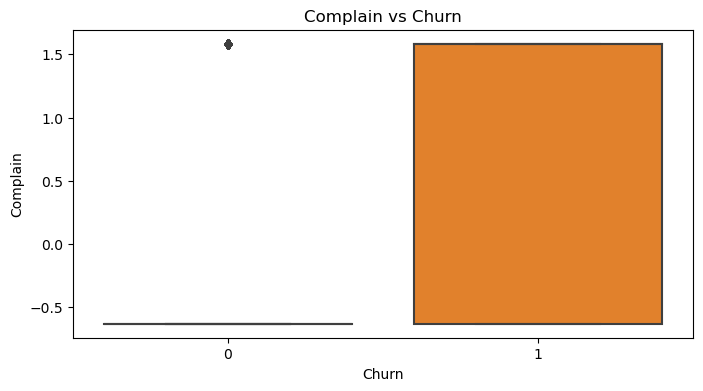

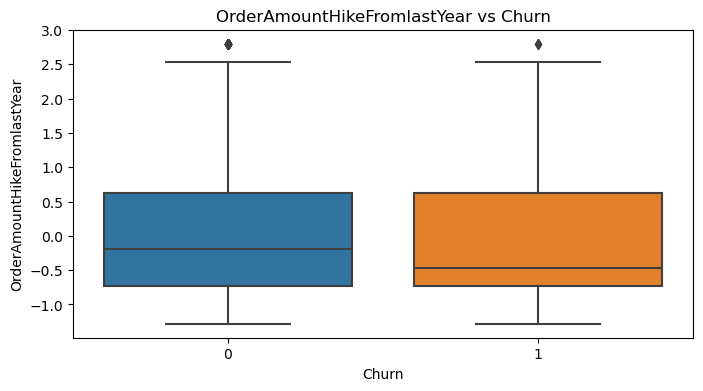

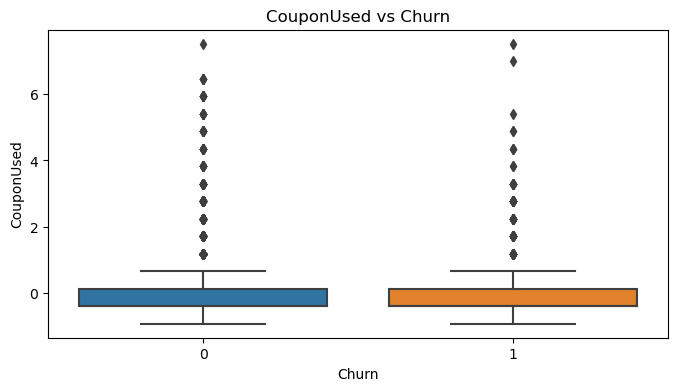

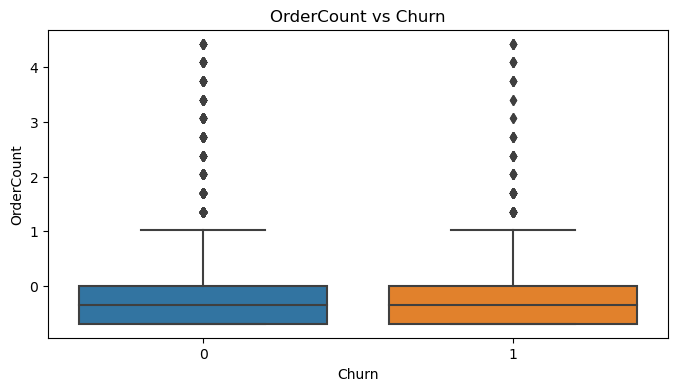

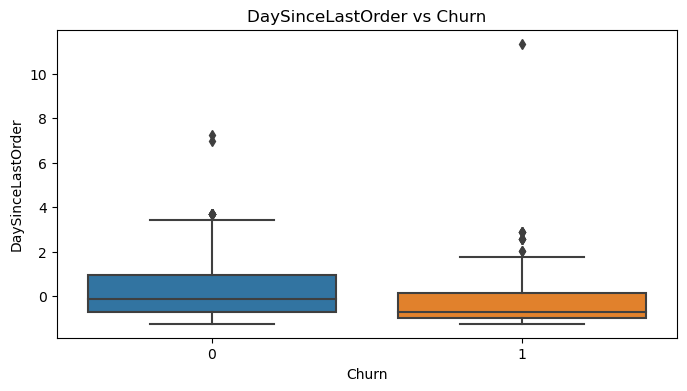

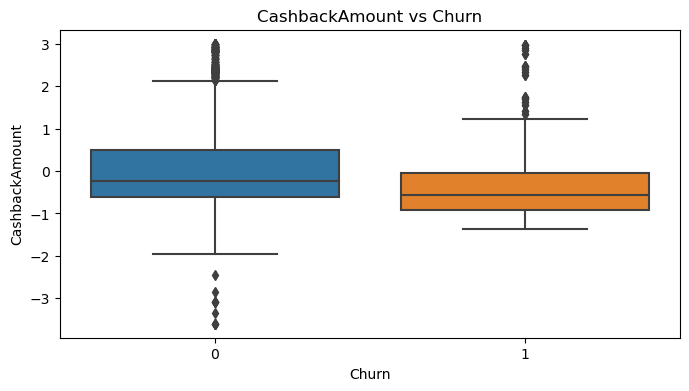

In [35]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=df_sheet1)
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a pipeline with imputer and scaler
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # You can choose a different imputation strategy if needed
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [40]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [41]:
# Predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_pred_test))
print("\nConfusion Matrix (Testing Set):")
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 0.8916518650088809
Testing Accuracy: 0.9182948490230906

Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       941
           1       0.87      0.59      0.71       185

    accuracy                           0.92      1126
   macro avg       0.90      0.79      0.83      1126
weighted avg       0.92      0.92      0.91      1126


Confusion Matrix (Testing Set):
[[924  17]
 [ 75 110]]


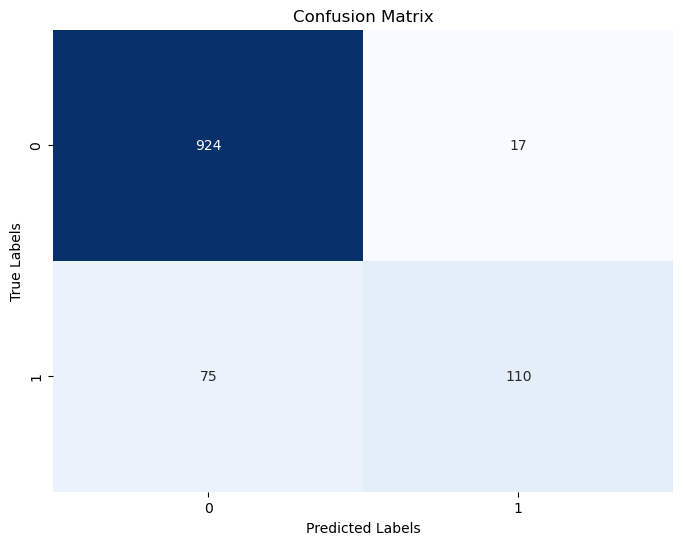

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
